       Distance from Residence to Work  Transportation expense
count                       740.000000              740.000000
mean                         29.631081              221.329730
std                          14.836788               66.952223
min                           5.000000              118.000000
25%                          16.000000              179.000000
50%                          26.000000              225.000000
75%                          50.000000              260.000000
max                          52.000000              388.000000
(740, 2)

- Cluster centers:
[[0.03024258 0.03726784]
 [0.05594374 0.03652943]
 [0.01517958 0.04505054]
 [0.01269014 0.02017006]]


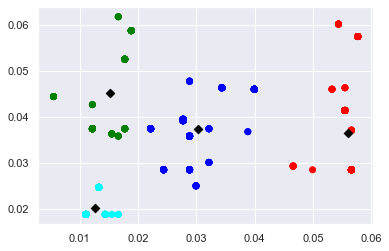

In [1]:
## import the packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans

## ler os dados
df = pd.read_csv('data.csv', sep=';')

## selecionar os dados e normalizar
from sklearn.preprocessing import normalize

#colL = ["Distance from Residence to Work", "Age"]
colL = ["Distance from Residence to Work", "Transportation expense"]
#colL = df.columns
print(df[colL].describe())
X1 = df[colL].to_numpy()
print(X1.shape)
X = normalize(X1,axis=0)
#X = X1

## preparar o modelo (escolher o k)
K = 4
model = KMeans(n_clusters=K, random_state=0, init="k-means++")
model.fit(X)

## testar a escolha do k
print(); print("- Cluster centers:")
print(model.cluster_centers_)

## Mostrar os dados
if (len(colL)==2):
    colors = ["blue","red","green",'cyan']
    V1 = [v[0] for v in X]
    V2 = [v[1] for v in X]
    VC = [colors[i] for i in model.labels_]
    C1 = [v[0] for v in model.cluster_centers_]
    C2 = [v[1] for v in model.cluster_centers_]
    plt.scatter(V1,V2,c=VC)
    plt.scatter(C1,C2,c="black", marker="D")

Text(0, 0.5, 'Distortion')

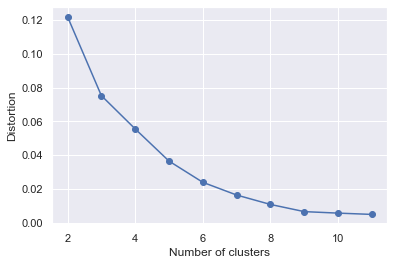

In [4]:
distortions = []
R = range(2, 12)
for K in R:
    model = KMeans(n_clusters=K, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)

plt.plot(R, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')